<a href="https://colab.research.google.com/github/maeve70/medical-insurance-project/blob/main/MedicalInsuranceCostsCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's explore this medical insurance costs csv file and see if there are any potential correlations between regions, ages, number of children and see how those variables might affect insurance costs. this is a WIP.

In [1]:
import csv
import pandas as pd
from scipy import stats
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import warnings
warnings.filterwarnings("ignore")

grabbing the csv from github (raw)

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/maeve70/random_stuff/main/insurance.csv")

Let's see what the file looks like.

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance.isnull().sum().sum() #no nulls! yay

0

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


You can see the means for each column above: 
age: 39, bmi, 30.6, children: 1, charges: 13270.42

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


What are some stats about the charges column? 

In [6]:
insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

That's a large mean!

Let's round the charges col to two decimal places using np.ceil
df['DataFrame column'].apply(np.ceil)


In [ ]:
insurance['charges'].apply(np.ceil)

0       16885.0
1        1726.0
2        4450.0
3       21985.0
4        3867.0
         ...   
1333    10601.0
1334     2206.0
1335     1630.0
1336     2008.0
1337    29142.0
Name: charges, Length: 1338, dtype: float64

What are the stats for BMI? (even though BMI isn't a valid health indicator. It's a bs number).

In [ ]:
insurance['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
insurance.head()

let's create dataframes based on regions. ex:
AL_NL_batting2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Year']== 2008).values]


What regions are there?

In [7]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
#league_avg98_2008 = AL_NLbatting98_2008.iloc[(AL_NLbatting98_2008['Name']== 'LgAvg per 600 PA').values]

southwest = insurance.iloc[(insurance['region']=='southwest').values]
southwest.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
12,23,male,34.4,0,no,southwest,1826.843
15,19,male,24.6,1,no,southwest,1837.237
18,56,male,40.3,0,no,southwest,10602.385
19,30,male,35.3,0,yes,southwest,36837.467


In [9]:
southeast = insurance.iloc[(insurance['region']=='southeast').values]
southeast.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251


In [ ]:
northwest = insurance.iloc[(insurance['region']=='northwest').values]
northwest.head()

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175


In [ ]:
northeast = insurance.iloc[(insurance['region']=='northeast').values]
northeast.head()

,age,sex,bmi,children,smoker,region,charges
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
16,52,female,30.780,1,no,northeast,10797.33620
17,23,male,23.845,0,no,northeast,2395.17155
20,60,female,36.005,0,no,northeast,13228.84695


Does one region have higher charges? let's plot to see.

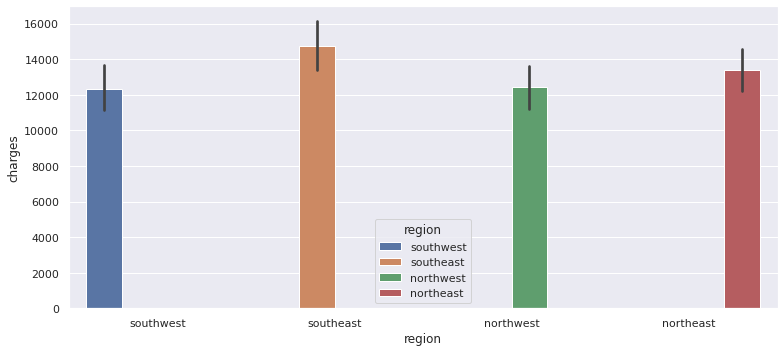

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "region", data=insurance)
plt.show()

Let's see what the BMI is by region and then test the means to see if there's any significant differences. Let's also visualize them

In [ ]:
southwest['bmi'].describe()

count    325.000000
mean      30.596615
std        5.691836
min       17.400000
25%       26.900000
50%       30.300000
75%       34.600000
max       47.600000
Name: bmi, dtype: float64

In [ ]:
southeast['bmi'].describe()

count    364.000000
mean      33.355989
std        6.477648
min       19.800000
25%       28.572500
50%       33.330000
75%       37.812500
max       53.130000
Name: bmi, dtype: float64

In [ ]:
northeast['bmi'].describe()

count    324.000000
mean      29.173503
std        5.937513
min       15.960000
25%       24.866250
50%       28.880000
75%       32.893750
max       48.070000
Name: bmi, dtype: float64

In [ ]:
northwest['bmi'].describe()

count    325.000000
mean      29.199785
std        5.136765
min       17.385000
25%       25.745000
50%       28.880000
75%       32.775000
max       42.940000
Name: bmi, dtype: float64

code to t-test:
stats.ttest_ind(Positive['HR'], NoPEDs['HR'])



In [ ]:
stats.ttest_ind(southwest['bmi'], southeast['bmi'])


Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)

so there is a significant p value (scientific number)

In [ ]:
sample_1_n = southwest.shape[0]
sample_2_n = southeast.shape[0]
sample_1_mean = southwest['bmi'].mean()
sample_2_mean = southeast['bmi'].mean()
sample_1_var = southwest['bmi'].var()
sample_2_var = southeast['bmi'].var()

print("the mean bmi in the southwest is " + str(sample_1_mean))

the mean bmi in the southwest is 30.59661538461538


In [ ]:
print("the mean bmi in the southeast is " + str(sample_2_mean))

the mean bmi in the southeast is 33.35598901098903


In [ ]:
#define a function b/c you'll use this again
#southwest is sample_1
#southeast is sample_2
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means of bmi's at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(southwest['bmi'],southeast['bmi'])

"The difference in means of bmi's at the 95% confidence interval (two-tail) is between 1.8506486875935768 and 3.6680985651537195."

That diff doesn't seem right. let me think on that.

let's see the strength of the relationship between the variables.

In [ ]:
#define Cohen's d function, you'll use again
def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")

get_cohens_d(southwest['bmi'], southeast['bmi'])

"Cohen's d is: -0.4525481755894482."

that's a small-medium strength of relationship between the variables.

let's see if there's a sig diff between southeast & northeast bmi

In [ ]:
stats.ttest_ind(southeast['bmi'], northeast['bmi'])

Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)

In [ ]:
sample_1_n = southeast.shape[0]
sample_2_n = northeast.shape[0]
sample_1_mean = southeast['bmi'].mean()
sample_2_mean = northeast['bmi'].mean()
sample_1_var = southeast['bmi'].var()
sample_2_var = northeast['bmi'].var()

print("the mean bmi in the southeast is " + str(sample_1_mean))

the mean bmi in the southeast is 33.35598901098903


In [ ]:
print("the mean bmi in the northeast is " + str(sample_2_mean))

the mean bmi in the northeast is 29.17350308641976


In [ ]:
#what's the diff in the means?
get_95_ci(southeast['bmi'],northeast['bmi'])

"The difference in means of bmi's at the 95% confidence interval (two-tail) is between -5.110299811934901 and -3.2546720372036333."

In [ ]:
#what's the cohen's d?
get_cohens_d(southeast['bmi'], northeast['bmi'])

"Cohen's d is: 0.6731339529932875."

that's a medium effect. that's good.

How about Southwest & Northeast?

In [ ]:
get_95_ci(southwest['bmi'],northeast['bmi'])

"The difference in means of bmi's at the 95% confidence interval (two-tail) is between -2.3180661998682126 and -0.5281583965230252."

In [ ]:
sample_1_n = southwest.shape[0]
sample_2_n = northeast.shape[0]
sample_1_mean = southwest['bmi'].mean()
sample_2_mean = northeast['bmi'].mean()
sample_1_var = southwest['bmi'].var()
sample_2_var = northeast['bmi'].var()

print("the mean bmi in the southwest is " + str(sample_1_mean))

the mean bmi in the southwest is 30.59661538461538


In [ ]:
print("the mean bmi in the northeast is " + str(sample_2_mean))

the mean bmi in the northeast is 29.17350308641976


Smokers by region?

In [ ]:
southeast.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
#northeast = insurance.iloc[(insurance['region']=='northeast').values]
southeast_smoker_yes = southeast.iloc[(southeast['smoker']=='yes').values]
southeast_smoker_yes.count()


age         91
sex         91
bmi         91
children    91
smoker      91
region      91
charges     91
dtype: int64

In [ ]:
southeast_smoker_no = southeast.iloc[(southeast['smoker']=='no').values]
southeast_smoker_no.count()

age         273
sex         273
bmi         273
children    273
smoker      273
region      273
charges     273
dtype: int64

let's visualize some bmi data between regions 

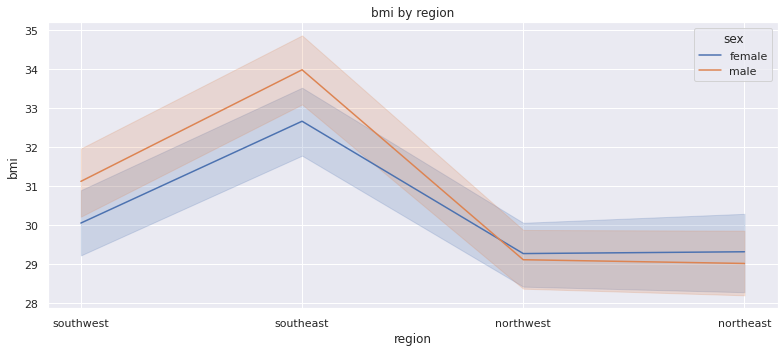

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.lineplot(x="region", y="bmi", hue= "sex", data=insurance)
plt.title("bmi by region")

plt.show()

You can concat two dfs by using this argument in the ax= :
data=pd.concat([NL_batting98_2008, AL_batting98_2008])

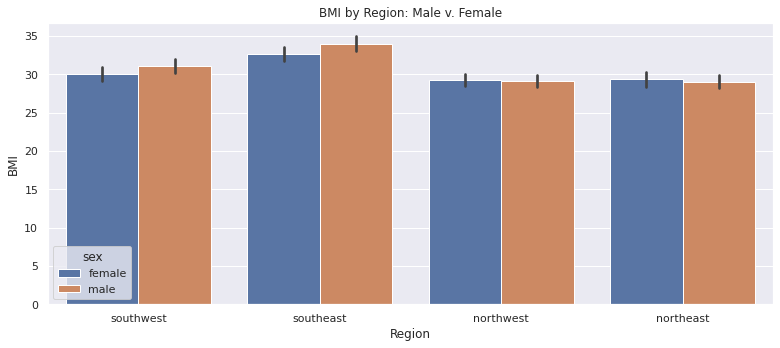

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="bmi", hue= "sex", data=insurance)
plt.xlabel("Region")
plt.ylabel("BMI")
plt.title("BMI by Region: Male v. Female")
plt.show()

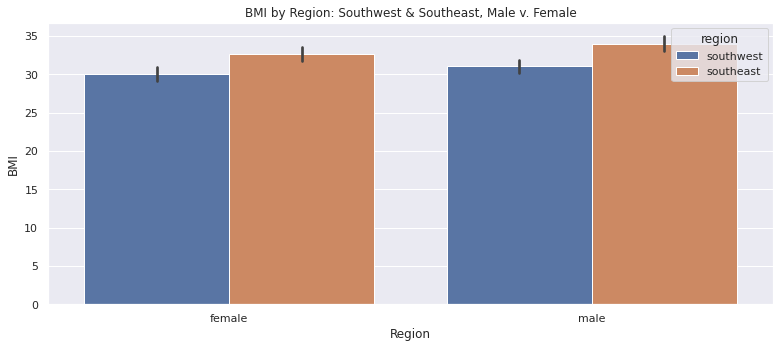

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="sex", y="bmi", hue= "region", data=pd.concat([southwest, southeast]))
plt.xlabel("Region")
plt.ylabel("BMI")
plt.title("BMI by Region: Southwest & Southeast, Male v. Female")
plt.show()

Median charges by sex.

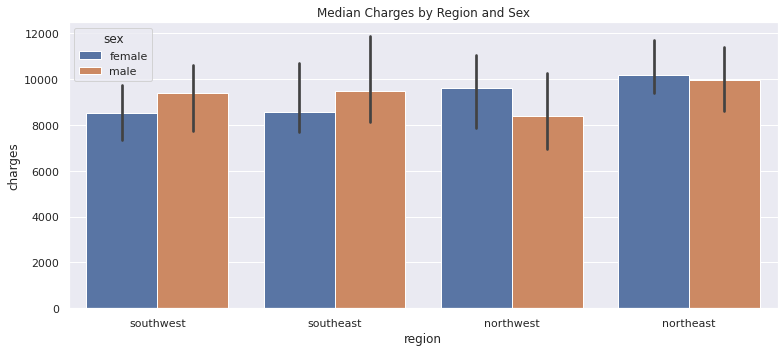

In [ ]:
from numpy import median
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "sex", estimator= median, data=insurance)
plt.title('Median Charges by Region and Sex')
plt.show()

Median charges by region and smoker status

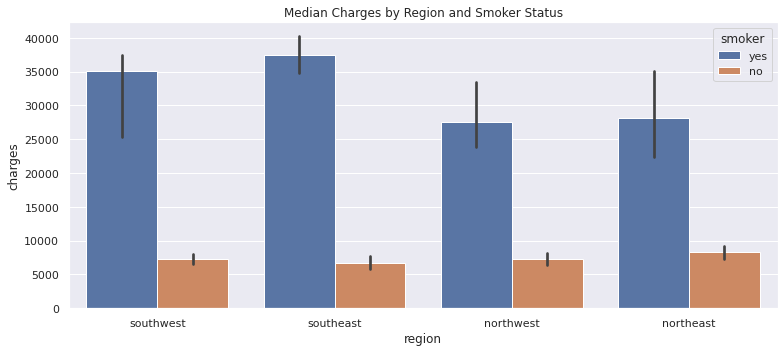

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "smoker", estimator= median, data=insurance)
plt.title('Median Charges by Region and Smoker Status')
plt.show()

Charges by region considering sex
charges by region considering children


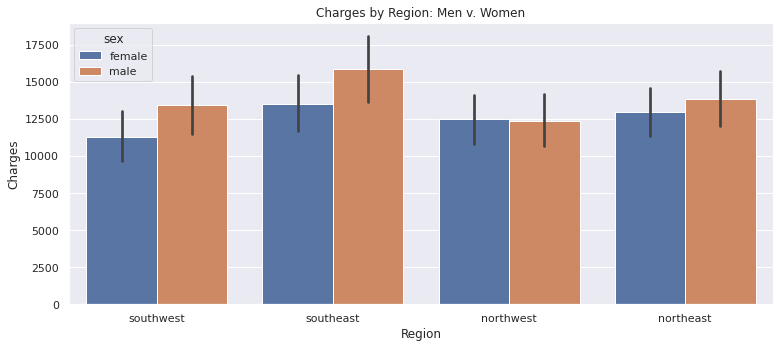

In [ ]:
#sns.axes_style('white')
sns.set_style="white"

plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "sex", data=insurance)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title("Charges by Region: Men v. Women")
plt.show()

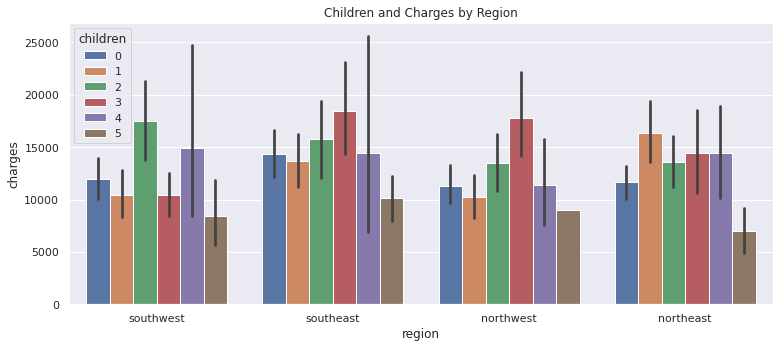

In [ ]:
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="charges", hue= "children", data=insurance)
plt.title("Children and Charges by Region")
plt.show()

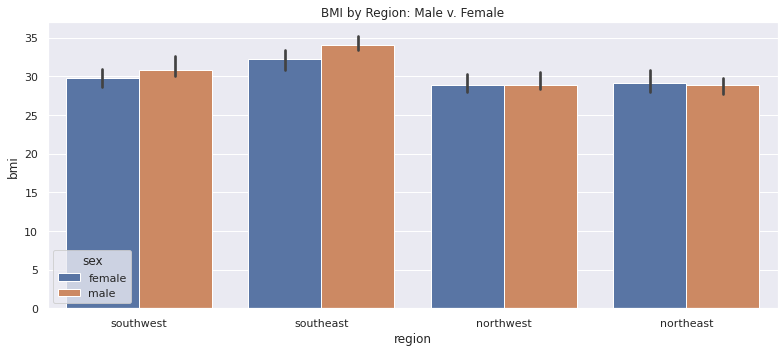

In [ ]:
#set_style("whitegrid")
plt.figure(figsize= (11, 5))
ax = sns.barplot(x="region", y="bmi", hue= "sex", estimator=median, data=insurance)
plt.title("BMI by Region: Male v. Female")
plt.show()